### This Jupyter Notebook is used for plotting the reaction profiles for the Computational Lab: Transition State Reactivity.

# Exercise 1

## 1. Reaction Profile - Free energy

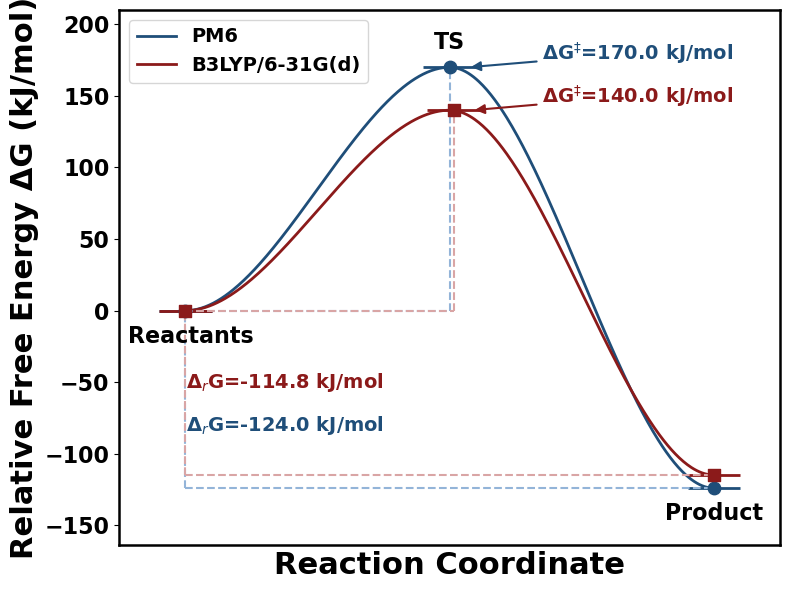

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ========= PM6 DATA (relative) =========
x_points = np.array([0.0, 1.0, 2.0])          # reaction coordinate
x_points_shifted = np.array([0.0, 1.015, 2.0])          # reaction coordinate to account for shifted dashed lines
G_PM6 = np.array([0.0, 170.0, -124.0])        # kJ/mol (relative)
G_R_PM6, G_TS_PM6, G_P_PM6 = G_PM6

# ========= DFT B3LYP/6-31G(d) DATA (relative) =========
G_DFT = np.array([0.0, 140.0, -114.8])        # kJ/mol (relative)
G_R_DFT, G_TS_DFT, G_P_DFT = G_DFT

# ----- Build smooth PM6 profile -----
t1 = np.linspace(0, 1, 200)
s1 = 3*t1**2 - 2*t1**3
x1 = t1
G1_PM6 = G_R_PM6 + (G_TS_PM6 - G_R_PM6)*s1

t2 = np.linspace(0, 1, 200)
s2 = 3*t2**2 - 2*t2**3
x2 = 1 + t2
G2_PM6 = G_TS_PM6 + (G_P_PM6 - G_TS_PM6)*s2

x_curve_PM6 = np.concatenate([x1, x2[1:]])
G_curve_PM6 = np.concatenate([G1_PM6, G2_PM6[1:]])

# ----- Build smooth DFT profile (same shape mapping) -----
G1_DFT = G_R_DFT + (G_TS_DFT - G_R_DFT)*s1
G2_DFT = G_TS_DFT + (G_P_DFT - G_TS_DFT)*s2
x_curve_DFT = x_curve_PM6.copy()              # same x grid
G_curve_DFT = np.concatenate([G1_DFT, G2_DFT[1:]])

# ----- Plot -----
plt.figure(figsize=(8,6))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.8)

# Reaction profiles
plt.plot(x_curve_PM6, G_curve_PM6, linewidth=2, color="#1F4E79", label="PM6")
plt.plot(x_curve_DFT, G_curve_DFT, linewidth=2, color="#8B1A1A",
         label="B3LYP/6-31G(d)")

# Mark the actual data points
plt.scatter(x_points, G_PM6, color="#1F4E79", zorder=5, s=80)
plt.scatter(x_points_shifted, G_DFT, color="#8B1A1A", zorder=5, marker="s", s=80)

# State labels along x-axis (no numeric ticks)
plt.text(0.02, min(G_PM6[0], G_DFT[0]) - 10, "Reactants",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(1, min(G_PM6[1], G_DFT[1]) +55, "TS",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(2, min(G_PM6[2], G_DFT[2]) - 10, "Product",
         ha="center", va="top", fontsize=16, fontweight="bold")

plt.xlabel("Reaction Coordinate", fontsize=22, fontweight="bold")
plt.ylabel("Relative Free Energy ΔG (kJ/mol)", fontsize=22, fontweight="bold")
plt.xticks([]) 
plt.yticks(fontsize=16, fontweight="bold")
plt.legend(prop = {"size": 14, "weight": "bold"}, loc="upper left")
                

# ----- Small horizontal lines for each state (length = 0.2) -----
half_len = 0.1

# PM6 horizontal segments
for x, G in zip(x_points, G_PM6):
    plt.hlines(G, x - half_len, x + half_len, colors="#1F4E79", linewidth=2)

# DFT horizontal segments
for x, G in zip(x_points_shifted, G_DFT):
    plt.hlines(G+0.02, x - half_len, x + half_len, colors="#8B1A1A",
               linewidth=2)

# ----- Activation energy and reaction free energy (PM6 + DFT) -----

# === PM6 ===
plt.hlines(G_R_PM6, 0, 1, linestyles="dashed", colors="#93B4D8")
plt.vlines(1, G_R_PM6, G_TS_PM6, linestyles="dashed", colors="#93B4D8")
# Leader-line label for PM6 ΔG‡ (to the right of TS)
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_PM6 - G_R_PM6),
    xy=(1.07, G_TS_PM6),                 # arrow starts at TS peak
    xytext=(1.35, G_TS_PM6+10),      # label to the right & slightly above
    arrowprops=dict(arrowstyle="-|>", color="#1F4E79", lw=1.5),
    color="#1F4E79", fontsize=14, fontweight='bold', va="center"
)

plt.hlines(G_P_PM6, 0, 2, linestyles="dashed", colors="#93B4D8")
plt.vlines(0, G_P_PM6, G_R_PM6, linestyles="dashed", colors="#93B4D8")
plt.text(0.75, -80,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_PM6 - G_R_PM6),
         color="#1F4E79", ha="right", va="center", fontsize=14, fontweight='bold')

# === DFT ===
plt.hlines(G_R_DFT, 0, 1.015, linestyles="dashed", colors="#D9A5A5")
plt.vlines(1.015, G_R_DFT, G_TS_DFT, linestyles="dashed", colors="#D9A5A5")
# Leader-line label for DFT ΔG‡ (to the right of TS, slightly lower)
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_DFT - G_R_DFT),
    xy=(1.085, G_TS_DFT),              # arrow starts at DFT TS peak
    xytext=(1.35, G_TS_DFT+10),      # label to the right & slightly below
    arrowprops=dict(arrowstyle="-|>", color="#8B1A1A", lw=1.5),
    color="#8B1A1A", fontsize=14, fontweight='bold', va="center"
)

plt.hlines(G_P_DFT , 0, 2, linestyles="dashed", colors="#D9A5A5")
plt.vlines(0, G_P_DFT , G_R_DFT , linestyles="dashed", colors="#D9A5A5")
plt.text(0.75, -50 ,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_DFT - G_R_DFT),
         color="#8B1A1A", ha="right", va="center", fontsize=14, fontweight="bold")

plt.xlim(-0.25, 2.25)
ymin = min(G_PM6.min(), G_DFT.min()) - 40
ymax = max(G_PM6.max(), G_DFT.max()) + 40
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.savefig("Exercise 1_Reaction Profile_free_energy.png",dpi=1200, bbox_inches='tight')
plt.show()

## 2. Reaction Profile (enthalpy)

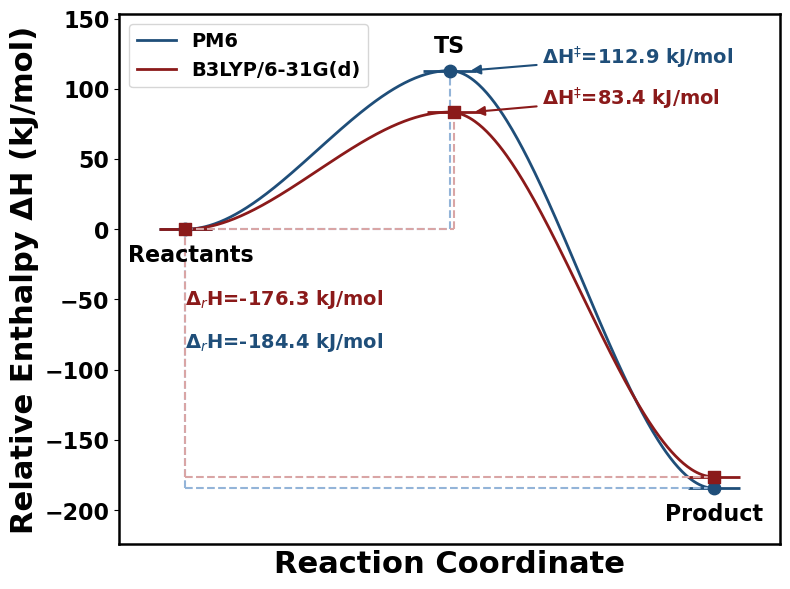

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ========= PM6 DATA (relative ENTHALPY) =========
x_points = np.array([0.0, 1.0, 2.0])          
x_points_shifted = np.array([0.0, 1.015, 2.0])  

H_PM6 = np.array([0.0, 112.9, -184.4])        # ΔH (kJ/mol, relative)
H_R_PM6, H_TS_PM6, H_P_PM6 = H_PM6

# ========= DFT B3LYP/6-31G(d) DATA (relative ENTHALPY) =========
H_DFT = np.array([0.0, 83.4, -176.3])         # ΔH (kJ/mol, relative)
H_R_DFT, H_TS_DFT, H_P_DFT = H_DFT

# ----- Build smooth PM6 profile -----
t1 = np.linspace(0, 1, 200)
s1 = 3*t1**2 - 2*t1**3
x1 = t1
H1_PM6 = H_R_PM6 + (H_TS_PM6 - H_R_PM6)*s1

t2 = np.linspace(0, 1, 200)
s2 = 3*t2**2 - 2*t2**3
x2 = 1 + t2
H2_PM6 = H_TS_PM6 + (H_P_PM6 - H_TS_PM6)*s2

x_curve_PM6 = np.concatenate([x1, x2[1:]])
H_curve_PM6 = np.concatenate([H1_PM6, H2_PM6[1:]])

# ----- Build smooth DFT profile (same shape mapping) -----
H1_DFT = H_R_DFT + (H_TS_DFT - H_R_DFT)*s1
H2_DFT = H_TS_DFT + (H_P_DFT - H_TS_DFT)*s2
x_curve_DFT = x_curve_PM6.copy()
H_curve_DFT = np.concatenate([H1_DFT, H2_DFT[1:]])

# ----- Plot -----
plt.figure(figsize=(8,6))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.8)

# Reaction profiles
plt.plot(x_curve_PM6, H_curve_PM6, linewidth=2, color="#1F4E79", label="PM6")
plt.plot(x_curve_DFT, H_curve_DFT, linewidth=2, color="#8B1A1A",
         label="B3LYP/6-31G(d)")

# Mark the actual data points
plt.scatter(x_points, H_PM6, color="#1F4E79", zorder=5, s=80)
plt.scatter(x_points_shifted, H_DFT, color="#8B1A1A", zorder=5, marker="s", s=80)

# State labels along x-axis
plt.text(0.02, min(H_PM6[0], H_DFT[0]) - 10, "Reactants",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(1, min(H_PM6[1], H_DFT[1]) + 55, "TS",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(2, min(H_PM6[2], H_DFT[2]) - 10, "Product",
         ha="center", va="top", fontsize=16, fontweight="bold")

plt.xlabel("Reaction Coordinate", fontsize=22, fontweight="bold")
plt.ylabel("Relative Enthalpy ΔH (kJ/mol)", fontsize=22, fontweight="bold")
plt.xticks([]) 
plt.yticks(fontsize=16, fontweight="bold")
plt.legend(prop = {"size": 14, "weight": "bold"}, loc="upper left")

# ----- Small horizontal lines for each state -----
half_len = 0.1

for x, H in zip(x_points, H_PM6):
    plt.hlines(H, x - half_len, x + half_len, colors="#1F4E79", linewidth=2)

for x, H in zip(x_points_shifted, H_DFT):
    plt.hlines(H+0.02, x - half_len, x + half_len, colors="#8B1A1A", linewidth=2)

# ----- Activation enthalpy and reaction enthalpy -----

# === PM6 ===
plt.hlines(H_R_PM6, 0, 1, linestyles="dashed", colors="#93B4D8")
plt.vlines(1, H_R_PM6, H_TS_PM6, linestyles="dashed", colors="#93B4D8")

plt.annotate(
    "ΔH$^‡$={:.1f} kJ/mol".format(H_TS_PM6 - H_R_PM6),
    xy=(1.07, H_TS_PM6),
    xytext=(1.35, H_TS_PM6+10),
    arrowprops=dict(arrowstyle="-|>", color="#1F4E79", lw=1.5),
    color="#1F4E79", fontsize=14, fontweight='bold', va="center"
)

plt.hlines(H_P_PM6, 0, 2, linestyles="dashed", colors="#93B4D8")
plt.vlines(0, H_P_PM6, H_R_PM6, linestyles="dashed", colors="#93B4D8")

plt.text(0.75, -80,
         "Δ$_r$H={:.1f} kJ/mol".format(H_P_PM6 - H_R_PM6),
         color="#1F4E79", ha="right", va="center", fontsize=14, fontweight='bold')

# === DFT ===
plt.hlines(H_R_DFT, 0, 1.015, linestyles="dashed", colors="#D9A5A5")
plt.vlines(1.015, H_R_DFT, H_TS_DFT, linestyles="dashed", colors="#D9A5A5")

plt.annotate(
    "ΔH$^‡$={:.1f} kJ/mol".format(H_TS_DFT - H_R_DFT),
    xy=(1.085, H_TS_DFT),
    xytext=(1.35, H_TS_DFT+10),
    arrowprops=dict(arrowstyle="-|>", color="#8B1A1A", lw=1.5),
    color="#8B1A1A", fontsize=14, fontweight='bold', va="center"
)

plt.hlines(H_P_DFT, 0, 2, linestyles="dashed", colors="#D9A5A5")
plt.vlines(0, H_P_DFT, H_R_DFT, linestyles="dashed", colors="#D9A5A5")

plt.text(0.75, -50,
         "Δ$_r$H={:.1f} kJ/mol".format(H_P_DFT - H_R_DFT),
         color="#8B1A1A", ha="right", va="center", fontsize=14, fontweight="bold")

plt.xlim(-0.25, 2.25)
ymin = min(H_PM6.min(), H_DFT.min()) - 40
ymax = max(H_PM6.max(), H_DFT.max()) + 40
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.savefig("Exercise 1_Reaction Profile_enthalpy.png", dpi=1200, bbox_inches='tight')
plt.show()

## Exercise 2

## 1. Reaction Profile (enthalpy)

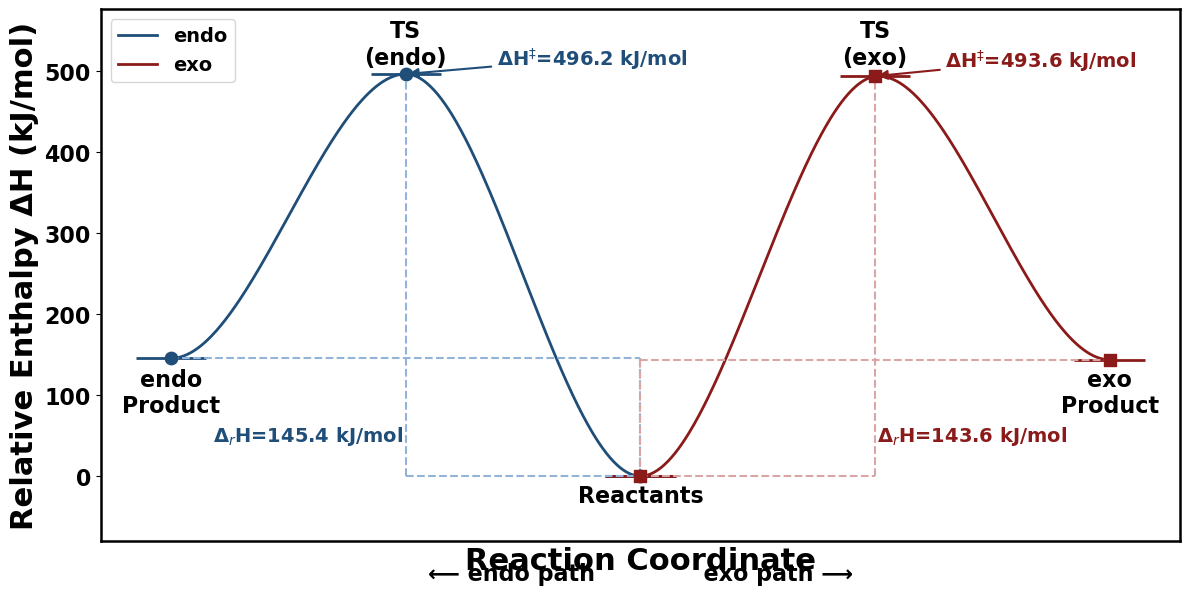

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ========= endo DATA (relative) =========
# reaction coordinate: 0 = Reactants, -1 = TS (endo), -2 = Product (endo)
x_points_endo = np.array([0.0, -1.0, -2.0])
H_endo = np.array([0.0, 496.2, 145.4])        # kJ/mol (relative)
H_R_endo, H_TS_endo, H_P_endo = H_endo

# ========= exo B3LYP/6-31G(d) DATA (relative) =========
# reaction coordinate: 0 = Reactants, 1.015 = TS (exo), 2 = Product (exo)
x_points_exo = np.array([0.0, 1, 2.0])
H_exo = np.array([0.0, 493.6, 143.6])        # kJ/mol (relative)
H_R_exo, H_TS_exo, H_P_exo = H_exo

# ----- Build smooth endo profile (centre -> left) -----
t1 = np.linspace(0, 1, 200)
s1 = 3*t1**2 - 2*t1**3
# Segment 1: Reactants (0) -> TS (-1)
x1_endo = 0.0 - t1
H1_endo = H_R_endo + (H_TS_endo - H_R_endo)*s1

t2 = np.linspace(0, 1, 200)
s2 = 3*t2**2 - 2*t2**3
# Segment 2: TS (-1) -> Product (-2)
x2_endo = -1.0 - t2
H2_endo = H_TS_endo + (H_P_endo - H_TS_endo)*s2

x_curve_endo = np.concatenate([x1_endo, x2_endo[1:]])
H_curve_endo = np.concatenate([H1_endo, H2_endo[1:]])

# ----- Build smooth exo profile (centre -> right) -----
# Use same parametric shape, but going 0 -> +1.015 -> +2
x1_exo = 0.0 + 1.015*t1           # 0 to 1.015
H1_exo = H_R_exo + (H_TS_exo - H_R_exo)*s1

x2_exo = 1.015 + (2.0-1.015)*t2   # 1.015 to 2
H2_exo = H_TS_exo + (H_P_exo - H_TS_exo)*s2

x_curve_exo = np.concatenate([x1_exo, x2_exo[1:]])
H_curve_exo = np.concatenate([H1_exo, H2_exo[1:]])

# ----- Plot -----
plt.figure(figsize=(12,6))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.8)

# Reaction profiles
plt.plot(x_curve_endo, H_curve_endo, linewidth=2, color="#1F4E79", label="endo")
plt.plot(x_curve_exo, H_curve_exo, linewidth=2, color="#8B1A1A",
         label="exo")

# Mark the actual data points
plt.scatter(x_points_endo, H_endo, color="#1F4E79", zorder=5, s=80)
plt.scatter(x_points_exo, H_exo, color="#8B1A1A", zorder=5, marker="s", s=80)

# State labels along x-axis (no numeric ticks)
plt.text(0.0, min(H_endo[0], H_exo[0]) - 10, "Reactants",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(0, ymin + 90, "⟵ endo path              exo path ⟶",
         ha="center", va="bottom", fontsize=16, fontweight="bold")
plt.text(-1, min(H_endo[1], H_exo[1]) + 70, "TS\n(endo)",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(1, min(H_endo[1], H_exo[1]) + 70, "TS\n(exo)",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(-2, min(H_endo[2], H_exo[2]) - 10, "endo\nProduct",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(2, min(H_endo[2], H_exo[2]) - 10, "exo\nProduct",
         ha="center", va="top", fontsize=16, fontweight="bold")

plt.xlabel("Reaction Coordinate", fontsize=22, fontweight="bold")
plt.ylabel("Relative Enthalpy ΔH (kJ/mol)", fontsize=22, fontweight="bold")
plt.xticks([]) 
plt.yticks(fontsize=16, fontweight="bold")
plt.legend(prop = {"size": 14, "weight": "bold"}, loc="upper left")

# ----- Small horizontal lines for each state (length = 0.2) -----
half_len = 0.15

# endo horizontal segments (left path)
for x, H in zip(x_points_endo, H_endo):
    plt.hlines(H, x - half_len, x + half_len, colors="#1F4E79", linewidth=2)

# exo horizontal segments (right path)
for x, H in zip(x_points_exo, H_exo):
    plt.hlines(H+0.02, x - half_len, x + half_len, colors="#8B1A1A",
               linewidth=2)

# ----- Activation energy and reaction free energy (endo + exo) -----

# === endo (left) ===
plt.hlines(H_R_endo, -1.0, 0.0, linestyles="dashed", colors="#93B4D8")
plt.vlines(-1.0, H_R_endo, H_TS_endo, linestyles="dashed", colors="#93B4D8")
plt.annotate(
    "ΔH$^‡$={:.1f} kJ/mol".format(H_TS_endo - H_R_endo),
    xy=(-1, H_TS_endo),
    xytext=(0.2, H_TS_endo+20),
    arrowprops=dict(arrowstyle="-|>", color="#1F4E79", lw=1.5),
    color="#1F4E79", fontsize=14, fontweight='bold', va="center",
    ha="right"
)

plt.hlines(H_P_endo, -2.0, 0.0, linestyles="dashed", colors="#93B4D8")
plt.vlines(0.0, H_P_endo, H_R_endo, linestyles="dashed", colors="#93B4D8")
plt.text(-1.82, 50,
         "Δ$_r$H={:.1f} kJ/mol".format(H_P_endo - H_R_endo),
         color="#1F4E79", ha="left", va="center", fontsize=14, fontweight='bold')

# === exo (right) ===
plt.hlines(H_R_exo, 0.0, 1, linestyles="dashed", colors="#D9A5A5")
plt.vlines(1, H_R_exo, H_TS_exo, linestyles="dashed", colors="#D9A5A5")
plt.annotate(
    "ΔH$^‡$={:.1f} kJ/mol".format(H_TS_exo - H_R_exo),
    xy=(1, H_TS_exo),
    xytext=(1.3, H_TS_exo+20),
    arrowprops=dict(arrowstyle="-|>", color="#8B1A1A", lw=1.5),
    color="#8B1A1A", fontsize=14, fontweight='bold', va="center",
    ha="left"
)

plt.hlines(H_P_exo , 0.0, 2.0, linestyles="dashed", colors="#D9A5A5")
plt.vlines(0.0, H_P_exo , H_R_exo , linestyles="dashed", colors="#D9A5A5")
plt.text(1.82, 50 ,
         "Δ$_r$H={:.1f} kJ/mol".format(H_P_exo - H_R_exo),
         color="#8B1A1A", ha="right", va="center", fontsize=14, fontweight="bold")

plt.xlim(-2.3, 2.3)
ymin = min(H_endo.min(), H_exo.min()) - 80
ymax = max(H_endo.max(), H_exo.max()) + 80
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.savefig("Exercise 2_Reaction Profile_enthalpy.png", dpi=1200, bbox_inches='tight')
plt.show()

## 2. Reaction Profile (free energy)

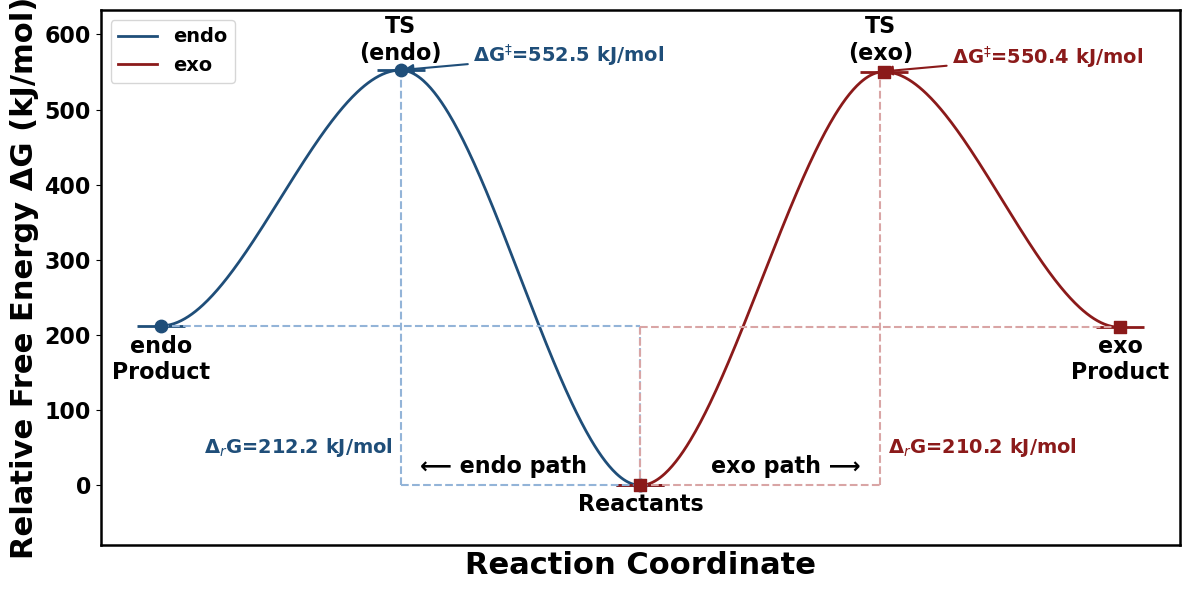

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ========= RAW FREE ENERGIES (Hartree) =========
G_cyclohexadiene = 0.116875
G_dioxole        = -0.052279
G_TS_exo         = 0.274214
G_TS_endo        = 0.275017
G_prod_exo       = 0.144654
G_prod_endo      = 0.145400

hartree_to_kj = 2625.5

# Reactants reference (set to 0)
G_reactants = G_cyclohexadiene + G_dioxole  # Hartree

# ========= BUILD RELATIVE ΔG ARRAYS (kJ/mol) =========
# endo path: [Reactants, TS_endo, Product_endo]
G_endo = np.array([
    0.0,
    (G_TS_endo  - G_reactants) * hartree_to_kj,
    (G_prod_endo - G_reactants) * hartree_to_kj
])

# exo path: [Reactants, TS_exo, Product_exo]
G_exo = np.array([
    0.0,
    (G_TS_exo  - G_reactants) * hartree_to_kj,
    (G_prod_exo - G_reactants) * hartree_to_kj
])

G_R_endo, G_TS_endo_rel, G_P_endo = G_endo
G_R_exo,  G_TS_exo_rel,  G_P_exo  = G_exo

# ========= REACTION COORDINATES =========
# 0 = Reactants, -1/-2 = endo TS/product, +1.015/+2 = exo TS/product
x_points_endo = np.array([0.0, -1.0, -2.0])
x_points_exo  = np.array([0.0,  1.015,  2.0])

# ----- Build smooth endo profile (centre -> left) -----
t1 = np.linspace(0, 1, 200)
s1 = 3*t1**2 - 2*t1**3
x1_endo = 0.0 - t1
G1_endo = G_R_endo + (G_TS_endo_rel - G_R_endo) * s1

t2 = np.linspace(0, 1, 200)
s2 = 3*t2**2 - 2*t2**3
x2_endo = -1.0 - t2
G2_endo = G_TS_endo_rel + (G_P_endo - G_TS_endo_rel) * s2

x_curve_endo = np.concatenate([x1_endo, x2_endo[1:]])
G_curve_endo = np.concatenate([G1_endo, G2_endo[1:]])

# ----- Build smooth exo profile (centre -> right) -----
x1_exo = 0.0 + 1.015 * t1
G1_exo = G_R_exo + (G_TS_exo_rel - G_R_exo) * s1

x2_exo = 1.015 + (2.0 - 1.015) * t2
G2_exo = G_TS_exo_rel + (G_P_exo - G_TS_exo_rel) * s2

x_curve_exo = np.concatenate([x1_exo, x2_exo[1:]])
G_curve_exo = np.concatenate([G1_exo, G2_exo[1:]])

# ========= PLOT =========
plt.figure(figsize=(12, 6))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.8)

# Reaction profiles
plt.plot(x_curve_endo, G_curve_endo, linewidth=2, color="#1F4E79", label="endo")
plt.plot(x_curve_exo,  G_curve_exo,  linewidth=2, color="#8B1A1A", label="exo")

# Mark actual data points
plt.scatter(x_points_endo, G_endo, color="#1F4E79", zorder=5, s=80)
plt.scatter(x_points_exo,  G_exo,  color="#8B1A1A", zorder=5, marker="s", s=80)

# State labels
plt.text(0.0, min(G_endo[0], G_exo[0]) - 10, "Reactants",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(0, ymin + 90, "⟵ endo path                exo path ⟶",
         ha="center", va="bottom", fontsize=16, fontweight="bold")
plt.text(-1, min(G_endo[1], G_exo[1]) + 75, "TS\n(endo)",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(1, min(G_endo[1], G_exo[1]) + 75, "TS\n(exo)",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(-2.0, min(G_endo[2], G_exo[2]) - 10, "endo\nProduct",
         ha="center", va="top", fontsize=16, fontweight="bold")
plt.text( 2.0, min(G_endo[2], G_exo[2]) - 10, "exo\nProduct",
         ha="center", va="top", fontsize=16, fontweight="bold")

plt.xlabel("Reaction Coordinate", fontsize=22, fontweight="bold")
plt.ylabel("Relative Free Energy ΔG (kJ/mol)", fontsize=22, fontweight="bold")
plt.xticks([])
plt.yticks(fontsize=16, fontweight="bold")
plt.legend(prop={"size": 14, "weight": "bold"}, loc="upper left")

# Small horizontal lines (length = 0.2)
half_len = 0.1
for x, G in zip(x_points_endo, G_endo):
    plt.hlines(G, x - half_len, x + half_len, colors="#1F4E79", linewidth=2)
for x, G in zip(x_points_exo, G_exo):
    plt.hlines(G, x - half_len, x + half_len, colors="#8B1A1A", linewidth=2)

# ----- Activation energy and reaction free energy (endo + exo) -----

# === endo (left) ===
plt.hlines(G_R_endo, -1.0, 0.0, linestyles="dashed", colors="#93B4D8")
plt.vlines(-1.0, G_R_endo, G_TS_endo_rel, linestyles="dashed", colors="#93B4D8")
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_endo_rel - G_R_endo),
    xy=(-1, G_TS_endo_rel),
    xytext=(0.1, G_TS_endo_rel+20),
    arrowprops=dict(arrowstyle="-|>", color="#1F4E79", lw=1.5),
    color="#1F4E79", fontsize=14, fontweight='bold', va="center",
    ha="right"
)

plt.hlines(G_P_endo, -2.0, 0.0, linestyles="dashed", colors="#93B4D8")
plt.vlines(0.0, G_P_endo, G_R_endo, linestyles="dashed", colors="#93B4D8")
plt.text(-1.82, 50,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_endo - G_R_endo),
         color="#1F4E79", ha="left", va="center", fontsize=14, fontweight='bold')

# === exo (right) ===
plt.hlines(G_R_exo, 0.0, 1, linestyles="dashed", colors="#D9A5A5")
plt.vlines(1, G_R_exo, G_TS_exo_rel, linestyles="dashed", colors="#D9A5A5")
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_exo_rel - G_R_exo),
    xy=(1, G_TS_exo_rel),
    xytext=(1.3, G_TS_exo_rel+20),
    arrowprops=dict(arrowstyle="-|>", color="#8B1A1A", lw=1.5),
    color="#8B1A1A", fontsize=14, fontweight='bold', va="center",
    ha="left"
)

plt.hlines(G_P_exo , 0.0, 2.0, linestyles="dashed", colors="#D9A5A5")
plt.vlines(0.0, G_P_exo , G_R_exo , linestyles="dashed", colors="#D9A5A5")
plt.text(1.82, 50 ,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_exo - G_R_exo),
         color="#8B1A1A", ha="right", va="center", fontsize=14, fontweight="bold")


plt.xlim(-2.25, 2.25)
ymin = min(G_endo.min(), G_exo.min()) - 80
ymax = max(G_endo.max(), G_exo.max()) + 80
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.savefig("Exercise_2_Reaction_Profile_free_energy.png", dpi=1200, bbox_inches="tight")
plt.show()

## Exercise 3

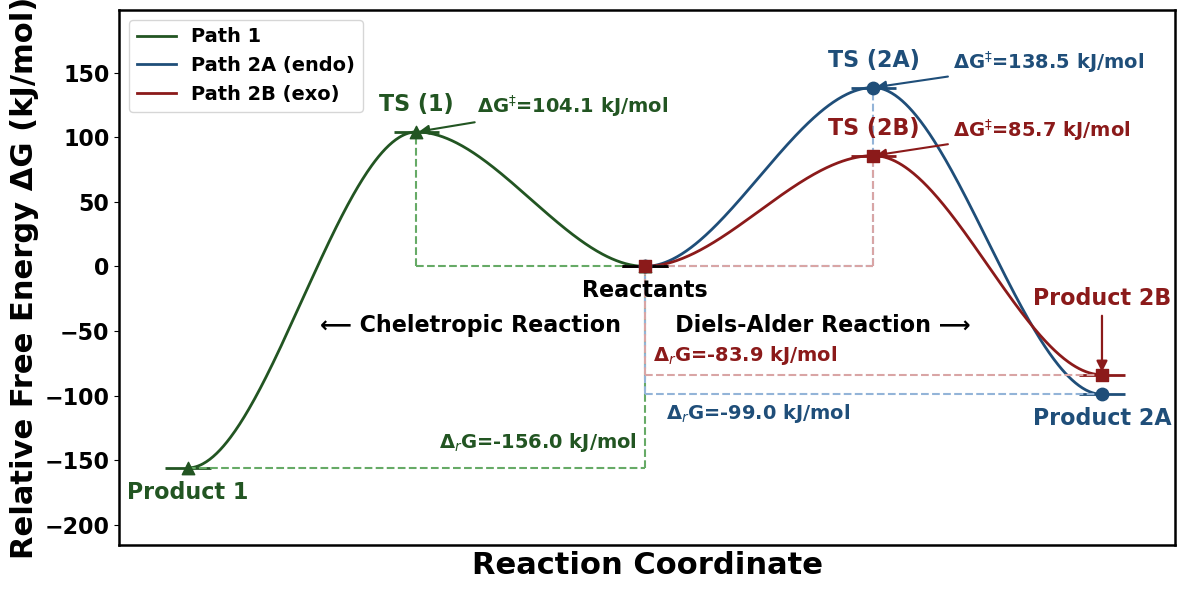

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ========= RAW FREE ENERGIES (Hartree) =========
G_xylyene = 0.178032
G_SO2     = -0.118615

# Path 1 Cheletropic
G_TS_1    = 0.099061
G_prod_1  = -0.000003

# Path 2 DA endo
G_TS_2    = 0.112154
G_prod_2  = 0.021696

# Path 3 DA exo
G_TS_3    = 0.092076
G_prod_3  = 0.027456

hartree_to_kj = 2625.5

# Reactants reference (set to 0)
G_reactants = G_xylyene + G_SO2  # Hartree

# ========= BUILD RELATIVE ΔG ARRAYS (kJ/mol) =========
# Path 1
G_path1 = np.array([
    0.0,
    (G_TS_1   - G_reactants) * hartree_to_kj,
    (G_prod_1 - G_reactants) * hartree_to_kj
])

# Path 2
G_path2 = np.array([
    0.0,
    (G_TS_2   - G_reactants) * hartree_to_kj,
    (G_prod_2 - G_reactants) * hartree_to_kj
])

# Path 3
G_path3 = np.array([
    0.0,
    (G_TS_3   - G_reactants) * hartree_to_kj,
    (G_prod_3 - G_reactants) * hartree_to_kj
])

# Unpack
G_R_1, G_TS_1_rel, G_P_1 = G_path1
G_R_2, G_TS_2_rel, G_P_2 = G_path2
G_R_3, G_TS_3_rel, G_P_3 = G_path3

# ========= REACTION COORDINATES =========
x_points_left = np.array([0.0, -1.0, -2.0])
x_points_r1   = np.array([0.0,  1.0,  2.0])
x_points_r2   = np.array([0.0,  1.0,  2.0])

# ----- Build smooth LEFT profile (centre → left) -----
t1 = np.linspace(0, 1, 200)
s1 = 3*t1**2 - 2*t1**3

x1_left = 0.0 - t1
G1_left = G_R_1 + (G_TS_1_rel - G_R_1) * s1

t2 = np.linspace(0, 1, 200)
s2 = 3*t2**2 - 2*t2**3

x2_left = -1.0 - t2
G2_left = G_TS_1_rel + (G_P_1 - G_TS_1_rel) * s2

x_curve_left = np.concatenate([x1_left, x2_left[1:]])
G_curve_left = np.concatenate([G1_left, G2_left[1:]])

# ----- Build smooth RIGHT profile 1 (centre → right) -----
x1_r1 = 0.0 + 1.0 * t1
G1_r1 = G_R_2 + (G_TS_2_rel - G_R_2) * s1

x2_r1 = 1.0 + (2.0 - 1.0) * t2
G2_r1 = G_TS_2_rel + (G_P_2 - G_TS_2_rel) * s2

x_curve_r1 = np.concatenate([x1_r1, x2_r1[1:]])
G_curve_r1 = np.concatenate([G1_r1, G2_r1[1:]])

# ----- Build smooth RIGHT profile 2 (centre → right) -----
x1_r2 = 0.0 + 1.0 * t1
G1_r2 = G_R_3 + (G_TS_3_rel - G_R_3) * s1

x2_r2 = 1.0 + (2.0 - 1.0) * t2
G2_r2 = G_TS_3_rel + (G_P_3 - G_TS_3_rel) * s2

x_curve_r2 = np.concatenate([x1_r2, x2_r2[1:]])
G_curve_r2 = np.concatenate([G1_r2, G2_r2[1:]])

# ========= PLOT =========
plt.figure(figsize=(12, 6))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.8)

# Reaction profiles
plt.plot(x_curve_left, G_curve_left, linewidth=2, color="#225522", label="Path 1")
plt.plot(x_curve_r1,   G_curve_r1,   linewidth=2, color="#1F4E79", label="Path 2A (endo)")
plt.plot(x_curve_r2,   G_curve_r2,   linewidth=2, color="#8B1A1A", label="Path 2B (exo)")

# Markers
plt.scatter(x_points_left, G_path1, color="#225522", zorder=5, s=80, marker="^")
plt.scatter(x_points_r1,   G_path2, color="#1F4E79", zorder=5, s=80, marker="o")
plt.scatter(x_points_r2,   G_path3, color="#8B1A1A", zorder=5, s=80, marker="s")

# Labels
G_all = np.concatenate([G_path1, G_path2, G_path3])

plt.text(0.0, -10, "Reactants", ha="center", va="top", fontsize=16, fontweight="bold")
plt.text(0, -55, "⟵ Cheletropic Reaction       Diels-Alder Reaction ⟶",
         ha="center", va="bottom", fontsize=16, fontweight="bold")
plt.text(-1.0, G_TS_1_rel + 30, "TS (1)", ha="center", va="top", fontsize=16, fontweight="bold", color="#225522")
plt.text( 1, G_TS_2_rel + 30, "TS (2A)", ha="center", va="top", fontsize=16, fontweight="bold", color="#1F4E79")
plt.text( 1, G_TS_3_rel + 30, "TS (2B)", ha="center", va="top", fontsize=16, fontweight="bold", color="#8B1A1A")

plt.text(-2.0, G_P_1 - 10, "Product 1", ha="center", va="top", fontsize=16, fontweight="bold", color="#225522")
plt.text( 2.0, G_P_2 - 10, "Product 2A", ha="center", va="top", fontsize=16, fontweight="bold", color="#1F4E79")
plt.annotate(
    "Product 2B",
    xy=(2.0, G_P_3),                 # point to the product marker
    xytext=(2.0, G_P_3 + 50),        # place text higher up
    ha="center", va="bottom",
    color="#8B1A1A", fontsize=16, fontweight="bold",
    arrowprops=dict(
        arrowstyle="-|>", lw=1.6,
        color="#8B1A1A"
    )
)

plt.xlabel("Reaction Coordinate", fontsize=22, fontweight="bold")
plt.ylabel("Relative Free Energy ΔG (kJ/mol)", fontsize=22, fontweight="bold")
plt.xticks([])
plt.yticks(fontsize=16, fontweight="bold")
plt.legend(prop={"size": 14, "weight": "bold"}, loc="upper left")

# Horizontal lines
half_len = 0.1
for x, G in zip(x_points_left, G_path1):
    plt.hlines(G, x - half_len, x + half_len, colors="#225522", linewidth=2)
for x, G in zip(x_points_r1, G_path2):
    plt.hlines(G, x - half_len, x + half_len, colors="#1F4E79", linewidth=2)
for x, G in zip(x_points_r2, G_path3):
    plt.hlines(G, x - half_len, x + half_len, colors="#8B1A1A", linewidth=2)

# ===== Activation energies ΔG‡ and reaction free energies ΔG_r =====
# --- Path 1 (left, green) ---
# Activation energy
plt.hlines(G_R_1, -1.0, 0.0, linestyles="dashed", colors="#66AA66")
plt.vlines(-1.0, G_R_1, G_TS_1_rel, linestyles="dashed", colors="#66AA66")
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_1_rel - G_R_1),
    xy=(-1.0, G_TS_1_rel),
    xytext=(0.1, G_TS_1_rel + 20),
    arrowprops=dict(arrowstyle="-|>", color="#225522", lw=1.5),
    color="#225522", fontsize=14, fontweight="bold", va="center", ha="right"
)

# Reaction free energy
plt.hlines(G_P_1, -2.0, 0.0, linestyles="dashed", colors="#66AA66")
plt.vlines(0.0, G_P_1, G_R_1, linestyles="dashed", colors="#66AA66")
plt.text(-0.9, G_P_1 + 20,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_1 - G_R_1),
         color="#225522", ha="left", va="center", fontsize=14, fontweight="bold")

# --- Path 2A (right, blue) ---
plt.hlines(G_R_2, 0.0, 1.0, linestyles="dashed", colors="#93B4D8")
plt.vlines(1.0, G_R_2, G_TS_2_rel, linestyles="dashed", colors="#93B4D8")
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_2_rel - G_R_2),
    xy=(1.0, G_TS_2_rel),
    xytext=(1.35, G_TS_2_rel + 20),
    arrowprops=dict(arrowstyle="-|>", color="#1F4E79", lw=1.5),
    color="#1F4E79", fontsize=14, fontweight="bold", va="center", ha="left"
)

plt.hlines(G_P_2, 0.0, 2.0, linestyles="dashed", colors="#93B4D8")
plt.vlines(0.0, G_P_2, G_R_2, linestyles="dashed", colors="#93B4D8")
plt.text(0.9, G_P_2 - 15,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_2 - G_R_2),
         color="#1F4E79", ha="right", va="center", fontsize=14, fontweight="bold")

# --- Path 2B (right, red) ---
plt.hlines(G_R_3, 0.0, 1.0, linestyles="dashed", colors="#D9A5A5")
plt.vlines(1.0, G_R_3, G_TS_3_rel, linestyles="dashed", colors="#D9A5A5")
plt.annotate(
    "ΔG$^‡$={:.1f} kJ/mol".format(G_TS_3_rel - G_R_3),
    xy=(1.0, G_TS_3_rel),
    xytext=(1.35, G_TS_3_rel + 20),
    arrowprops=dict(arrowstyle="-|>", color="#8B1A1A", lw=1.5),
    color="#8B1A1A", fontsize=14, fontweight="bold", va="center", ha="left"
)

plt.hlines(G_P_3, 0.0, 2.0, linestyles="dashed", colors="#D9A5A5")
plt.vlines(0.0, G_P_3, G_R_3, linestyles="dashed", colors="#D9A5A5")
plt.text(0.84, G_P_3 + 15,
         "Δ$_r$G={:.1f} kJ/mol".format(G_P_3 - G_R_3),
         color="#8B1A1A", ha="right", va="center", fontsize=14, fontweight="bold")

plt.hlines(0, -0.1, +0.1, linewidth=2, color="black")

# Axes
plt.xlim(-2.3, 2.32)
plt.ylim(G_all.min() - 60, G_all.max() + 60)

plt.tight_layout()
plt.savefig("Exercise_3_Reaction_Profile_free_energy.png", dpi=1200, bbox_inches="tight")
plt.show()